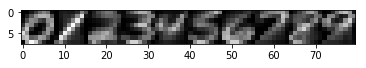

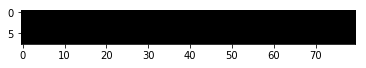

In [12]:
'''
Question 2.2 Skeleton Code

Here you should implement and evaluate the Naive Bayes classifier.
'''

import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt

def binarize_data(pixel_values):
    '''
    Binarize the data by thresholding around 0.5
    '''
    return np.where(pixel_values > 0.5, 1.0, 0.0)

def compute_parameters(train_data, train_labels):
    '''
    Compute the eta MAP estimate/MLE with augmented data

    You should return a numpy array of shape (10, 64)
    where the ith row corresponds to the ith digit class.

    slides p29
    '''
    eta = np.zeros((10, 64))
    a = b = 2
    for k in range(10):
        k_digits = data.get_digits_by_label(train_data, train_labels, k)
        # n = nh + nt
        n = len(k_digits)
        for j in range(64):
            nh = np.sum(k_digits, axis=0)[j]
            eta[k, j] = (nh + a - 1)/(n + a + b -2)
    return eta

def plot_images(class_images):
    '''
    Plot each of the images corresponding to each class side by side in grayscale
    '''
    all = []
    for i in range(10):
        img_i = class_images[i]
        img_i = img_i.reshape((8, 8))
        all.append(img_i)

    all_concat = np.concatenate(all, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

def generate_new_data(eta):
    '''
    Sample a new data point from your generative distribution p(x|y,theta) for
    each value of y in the range 0...10

    Plot these values
    '''
    generated_data = np.zeros((10, 64))
    plot_images(generated_data)

def generative_likelihood(bin_digits, eta):
    '''
    Compute the generative log-likelihood:
        log p(x|y, eta)

    Should return an n x 10 numpy array 
    '''
    return None

def conditional_likelihood(bin_digits, eta):
    '''
    Compute the conditional likelihood:

        log p(y|x, eta)

    This should be a numpy array of shape (n, 10)
    Where n is the number of datapoints and 10 corresponds to each digit class
    '''
    return None

def avg_conditional_likelihood(bin_digits, labels, eta):
    '''
    Compute the average conditional likelihood over the true class labels

        AVG( log p(y_i|x_i, eta) )

    i.e. the average log likelihood that the model assigns to the correct class label
    '''
    cond_likelihood = conditional_likelihood(bin_digits, eta)

    # Compute as described above and return
    return None

def classify_data(bin_digits, eta):
    '''
    Classify new points by taking the most likely posterior class
    '''
    cond_likelihood = conditional_likelihood(bin_digits, eta)
    # Compute and return the most likely class
    pass

def main():
    train_data, train_labels, test_data, test_labels = data.load_all_data('data')
    train_data, test_data = binarize_data(train_data), binarize_data(test_data)

    # Fit the model
    eta = compute_parameters(train_data, train_labels)

    # Evaluation
    plot_images(eta)
    # print(eta)

    generate_new_data(eta)

if __name__ == '__main__':
    main()
